A/B Testing email subject lines

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Simulate Email campaign data
np.random.seed(123)

In [3]:
n_emails = 1000

In [4]:
# Subject Line A- Open Rate: 18%
group_A = pd.DataFrame({
    'group':'A',
    'opened':np.random.binomial(1, 0.18, n_emails)
})

In [5]:
# Subject Line B- Open Rate: 22%
group_B = pd.DataFrame({
    'group':'B',
    'opened':np.random.binomial(1, 0.22, n_emails)
})

In [6]:
# data combine
data = pd.concat([group_A, group_B])

In [7]:
# Summary statistics
summary = data.groupby('group')['opened'].agg(['mean', 'sum', 'count'])
summary.columns = ['Open Rate', 'Total Opens', 'Total Sent']
print('Summary Statistics:\n', summary)

Summary Statistics:
        Open Rate  Total Opens  Total Sent
group                                    
A          0.179          179        1000
B          0.236          236        1000


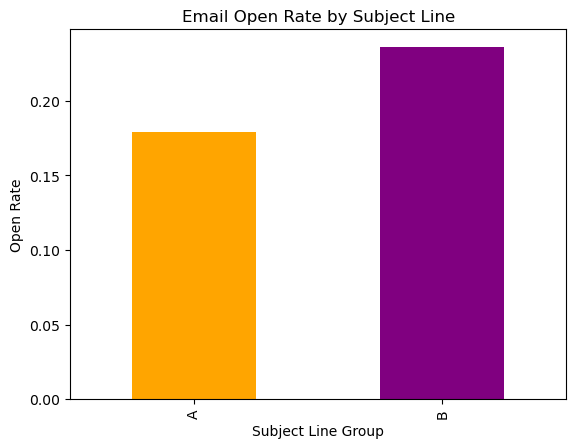

In [8]:
# Visualize
summary['Open Rate'].plot(kind='bar', color=['orange', 'purple'], 
                         title='Email Open Rate by Subject Line')
plt.ylabel('Open Rate')
plt.xlabel('Subject Line Group')
plt.show()

In [9]:
# Statistical Test-ChiSquared
contingency = pd.crosstab(data['group'], data['opened'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

In [10]:
print("\nChi-Squared Test Results:")
print(f"Chi2: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print("Conclusion:", "Significant Difference" if p<0.05 else "No significant difference")


Chi-Squared Test Results:
Chi2: 9.5352
P-Value: 0.0020
Conclusion: Significant Difference


RESULT
- p-value < 0.05, we conclude the difference is statistically significant.
- Subject line B performs signifacntly better than A at increasing email open rates